In [5]:
import pandas as pd
df_city = pd.read_csv('raw_data/city_data.csv')
df_city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
df_city = df_city.set_index('city')
df_city.head()

,driver_count,type
city,,
Kelseyland,63,Urban
Nguyenbury,8,Urban
East Douglas,12,Urban
West Dawnfurt,34,Urban
Rodriguezburgh,52,Urban


In [7]:
df_city.shape

(126, 2)

In [17]:
df_type = df_city['type']
# there are duplicate city names -> use .first() to get only the first row for each city
s_type = df_type.groupby(df_type.index).first()
s_type.shape

(125,)

In [9]:
df_d_count = df_city[['driver_count']]
df_d_count.head()

,driver_count
city,
Kelseyland,63
Nguyenbury,8
East Douglas,12
West Dawnfurt,34
Rodriguezburgh,52


In [10]:
df_d_count.shape

(126, 1)

In [11]:
s_drivers = df_d_count.groupby('city')['driver_count'].sum()
s_drivers.shape

(125,)

In [144]:
s_drivers.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [ ]:
# Read the driver data

In [12]:
df_ride_data = pd.read_csv('raw_data/ride_data.csv')
df_ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [ ]:
# get from rider data by city: ride count, average fare

In [14]:
s_ride_count = df_ride_data.groupby('city')['ride_id'].count()
s_ride_count.name = 'ride_count'
s_ride_count.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_count, dtype: int64

In [15]:
s_avg_fare = df_ride_data.groupby('city')['fare'].mean()
s_avg_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [ ]:
#s_drivers = df_ride_data.groupby('city')['']

In [18]:
df_city.shape, s_type.shape, s_drivers.shape, s_ride_count.shape, s_avg_fare.shape


((126, 2), (125,), (125,), (125,), (125,))

In [ ]:
# Combine four series into one data frame

In [19]:
df_data = pd.concat([s_ride_count, s_avg_fare, s_type, s_drivers], axis=1, join='inner')
df_data.head()

,ride_count,fare,type,driver_count
city,,,,
Alvarezhaven,31,23.928710,Urban,21
Alyssaberg,26,20.609615,Urban,67
Anitamouth,9,37.315556,Suburban,16
Antoniomouth,22,23.625000,Urban,21
Aprilchester,19,21.981579,Urban,49


In [ ]:
# get data for each of 3 city types

In [20]:
# Urban data
df_urban = df_data.loc[ df_data['type']=='Urban' ]
df_urban.shape

(66, 4)

In [21]:
df_urban.head()

,ride_count,fare,type,driver_count
city,,,,
Alvarezhaven,31,23.928710,Urban,21
Alyssaberg,26,20.609615,Urban,67
Antoniomouth,22,23.625000,Urban,21
Aprilchester,19,21.981579,Urban,49
Arnoldview,31,25.106452,Urban,41


In [22]:
df_urban.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, Alvarezhaven to Zimmermanmouth
Data columns (total 4 columns):
ride_count      66 non-null int64
fare            66 non-null float64
type            66 non-null object
driver_count    66 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.6+ KB


In [23]:
# Suburban data
df_sub = df_data.loc[ df_data['type']=='Suburban' ]
df_sub.shape

(41, 4)

In [24]:
# Rural data
df_rural = df_data.loc[ df_data['type']=='Rural' ]
df_rural.shape

(18, 4)

In [ ]:
# ------ Create the bubble plot ---------

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

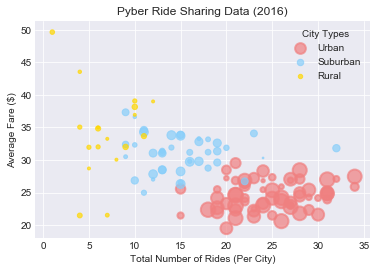

In [26]:
scatter, ax = plt.subplots()
opacity = 0.7
size_f = 3
lw = 2
ax = sns.regplot(x='ride_count', y='fare', data=df_urban, fit_reg=False, color='lightcoral', 
            scatter_kws={'s':df_urban['driver_count']*size_f, 'alpha':opacity, 'linewidths':lw},
            label='Urban')
ax = sns.regplot(x='ride_count', y='fare', data=df_sub, fit_reg=False, color='lightskyblue', 
                scatter_kws={'s':df_sub['driver_count']*size_f, 'alpha':opacity},
                label='Suburban')
ax = sns.regplot(x='ride_count', y='fare', data=df_rural, fit_reg=False, color='gold', 
                scatter_kws={'s':df_rural['driver_count']*size_f, 'alpha':opacity},
                label='Rural')

ax.set_title("Pyber Ride Sharing Data (2016)")
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.legend(title='City Types')

In [27]:
# Pie chart:  Total fares by city type
s_fare_sum_by_type = df_ride_data.groupby('city')['fare'].sum()
s_fare_sum_by_type.head()


city
Alvarezhaven    741.79
Alyssaberg      535.85
Anitamouth      335.84
Antoniomouth    519.75
Aprilchester    417.65
Name: fare, dtype: float64

In [28]:
df_fare_and_type = pd.concat([s_fare_sum_by_type, s_type], axis=1)
df_fare_and_type.head()

,fare,type
city,,
Alvarezhaven,741.79,Urban
Alyssaberg,535.85,Urban
Anitamouth,335.84,Suburban
Antoniomouth,519.75,Urban
Aprilchester,417.65,Urban


In [29]:
# create fair sums by city type
s_fare_sum_by_type = df_fare_and_type.groupby('type')['fare'].sum()
s_fare_sum_by_type

type
Rural        4255.09
Suburban    19317.88
Urban       40078.34
Name: fare, dtype: float64

In [31]:
# find percents for each fare sum by type
fare_by_type = list(s_fare_sum_by_type)
fare_by_type_labels = list(s_fare_sum_by_type.index)
all_fare_total = sum(fare_by_type)
fare_percent_by_type = [f * (100/all_fare_total) for f in fare_by_type]
fare_by_type, all_fare_total, fare_percent_by_type, fare_by_type_labels

([4255.09, 19317.879999999997, 40078.34],
 63651.31,
 [6.684999884527122, 30.349540331534417, 62.96545978393846],
 ['Rural', 'Suburban', 'Urban'])

In [32]:
# Rural and Suburban will be exploded (separated) from main pie
# Rural, Sub, Urban
expl = (0.1, 0.1, 0)
colors = ('gold', 'lightskyblue', 'lightcoral')

Text(0.5,1,'% of Total Fares by City Type')

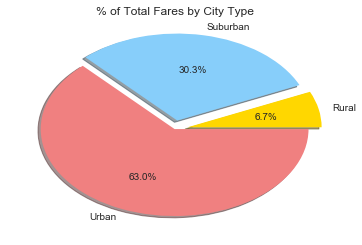

In [33]:
fig, ax = plt.subplots()
ax.pie(fare_percent_by_type, explode=expl, labels=fare_by_type_labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('% of Total Fares by City Type')